In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from random import randrange
import cv2
import scipy
data = datasets.fetch_olivetti_faces()
LA = np.linalg

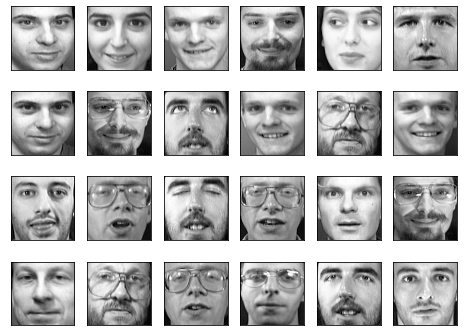

In [10]:
pckg = scipy.io.loadmat('faces.mat')
faces = data.images[:]
fig = plt.figure(figsize=(8, 6))
for i in range(24):
    ax = fig.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(faces[randrange(0, 200)], cmap="gray")

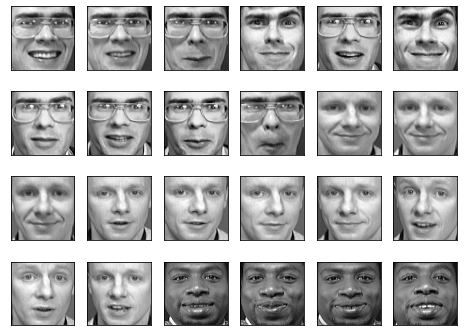

In [11]:
fig = plt.figure(figsize=(8, 6))
for i in range(24):
    ax = fig.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(faces[i+190], cmap="gray")

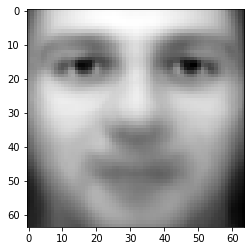

In [12]:
training_faces = np.copy(faces[0:int((len(faces)-5)/2)])
sum = np.copy(training_faces[0])
for i in training_faces:
    sum += np.copy(i)
avgFace = sum / len(training_faces)
plt.imshow(avgFace, cmap="gray")
# plt.imshow(training_faces[-1], cmap="gray")
# print(avgFace)

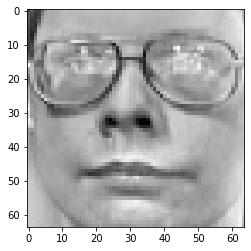

In [25]:
mSub = np.copy(training_faces) - avgFace
plt.imshow(mSub[37], cmap="gray")

In [14]:
fMSub = []
for i in mSub:
    fMSub.append(np.array(i.flatten()))
fMSub = np.array(fMSub)
print(fMSub.shape)

(197, 4096)


(4096, 4096)


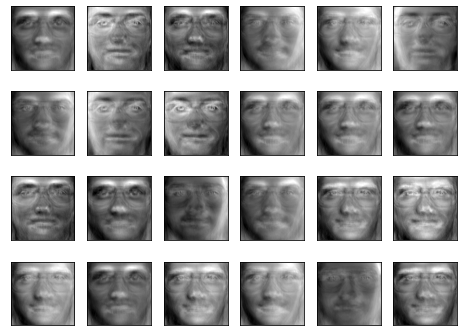

In [15]:
cov = (np.matmul(fMSub.T,fMSub))*(1/len(fMSub))
print(cov.shape)
fig = plt.figure(figsize=(8, 6))
for i in range(24):
    ax = fig.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(cov[randrange(0, 400)].reshape(64, 64), cmap="gray")

[ 0.02192089  0.02450991  0.02723236 ... -0.03356684 -0.02946289
 -0.02778598]
[-0.00050026 -0.0032941  -0.00650381 ... -0.00581847 -0.00457355
 -0.00445639]
[-0.02192089 -0.00050026 -0.00592374 ... -0.00089887 -0.00076654
 -0.00445948]
[-0.02450991 -0.0032941  -0.00622717 ...  0.00733996  0.0077435
 -0.01238383]


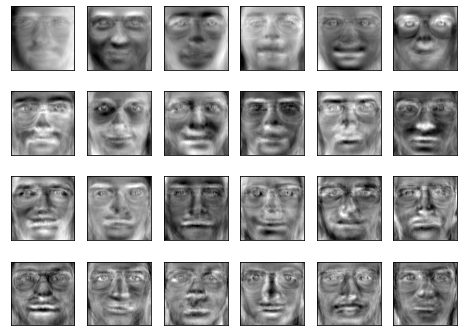

In [19]:
x, y, eigVec = LA.svd(fMSub, full_matrices=0)
# eigen_values, eigen_vecotrs  = LA.eig(cov)
# eigVec = np.array(eigVec)
# print(eigVec.shape)
# eigVec = [i for i in eigVec]
# eigVec = np.array(eigVec)
print(eigVec[0])
print(eigVec[1])
print(eigen_vecotrs[0])
print(eigen_vecotrs[1])
eigen_vecotrs = eigen_vecotrs.T
fig = plt.figure(figsize=(8, 6))
for i in range(24):
    ax = fig.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(eigen_vecotrs[i].reshape(64, 64), cmap='gray')

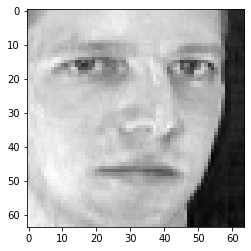

In [27]:
dimg = np.array(cv2.imread("31.png", 0))
img = []
for i in dimg:
    img.append(np.array(i).flatten())
img = cv2.resize(np.array(img), (64, 64)) / 255
cd = mSub[1]
# cd = img - avgFace
rc = avgFace.flatten()
for i in eigVec[0:-60]:
#     print(np.dot(i, cd.flatten()))
    rc += np.dot(i, cd.flatten())*i
    
plt.imshow(rc.reshape(64, 64), cmap="gray")

In [22]:
wightedFaces = []
for face in training_faces:
    weights = []
    for eig in eigVec:
        weights.append(np.dot(eig, face.flatten()))
    wightedFaces.append({"face": face, "weights": np.array(weights)})
wightedFaces = np.array(wightedFaces)
wightedFaces.shape

(197,)

0.9876674290640474


Text(0.5, 0, 'Match')

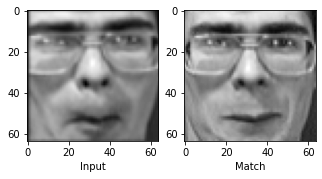

In [23]:
# Import Img
dimg = np.array(cv2.imread("106.png", 0))
img = []
for i in dimg:
    img.append(np.array(i).flatten())
img = cv2.resize(np.array(img), (64, 64)) / 255
face = img
# Weights
weights = []
for i in eigVec:
    weights.append(np.dot(i, face.flatten()))
weights = np.array(weights)
# print(weights)
# print(wightedFaces[0]["weights"])
matches = []
for wface in wightedFaces:
    corr = np.corrcoef(weights, wface["weights"])[0, 1]
#     print(corr)
    matches.append({"face": wface["face"], "corr": corr})
sortedMatches = sorted(matches,key=lambda d: d['corr'], reverse=True)
print(sortedMatches[0]["corr"])
# plt.imshow(sortedMatches[0]["face"], cmap="gray")
fig = plt.figure(figsize=(8, 6))
# Input Face
nimg = fig.add_subplot(1, 3, 2)
nimg.imshow(face, cmap="gray")
nimg.set_xlabel('Input')
# Mean Face
mimg = fig.add_subplot(1, 3, 3)
mimg.imshow(sortedMatches[0]["face"], cmap="gray")
mimg.set_xlabel('Match')